In [15]:
from keras.layers import Input, Dense, Lambda, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
IMAGE_SIZE = [244,244]

In [17]:
train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [18]:
vgg = VGG16(include_top = False, weights= 'imagenet', input_shape=IMAGE_SIZE+[3])

In [19]:
for layer in vgg.layers:
    layer.trainable = False

In [20]:
folders = glob('Datasets/Train/*')

In [21]:
folders

['Datasets/Train\\Kalam', 'Datasets/Train\\Teresa']

In [22]:
x = Flatten()(vgg.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
model = Model(inputs = vgg.input, outputs = prediction)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [26]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale= 1./255,
                               shear_range=0.2,
                               zoom_range= 0.2,
                               horizontal_flip=True)
test_data = ImageDataGenerator(rescale= 1./255)

In [29]:
training_set = train_data.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_data.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 5 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [30]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 45s 45s/step - loss: 0.5595 - accuracy: 0.6000 - val_loss: 0.6994 - val_accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 0.4288 - accuracy: 0.8000 - val_loss: 0.0613 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.1966 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.2599 - accuracy: 0.8000 - val_loss: 0.1197 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0732 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 1.0000


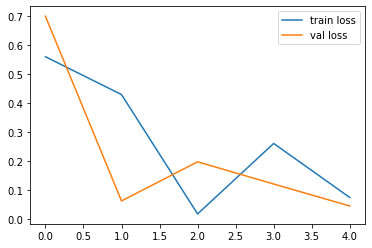

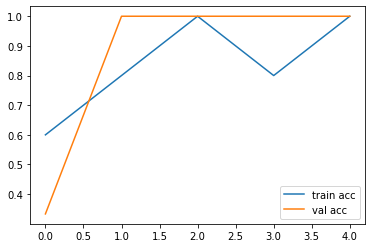

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')